# Marketing Camapign Dataset for Customer Retention


### Dataset Description

https://www.kaggle.com/davinwijaya/customer-retention


* id - customer id

* recency - months since last purchase

* history - value of the historical purchases in Euros

* used_discount - indicates if the customer used a discount before

* used_bogo - indicates if the customer used a buy one get one before

* zip_code - class of the zip code as Suburban/Urban/Rural

* is_referral - indicates if the customer was acquired from referral channel

* channel - channels that the customer using, Phone/Web/Multichannel

* offer - the offers sent to the customers, Discount/But One Get One/No Offer

* conversion - customer conversion(buy or not)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', None)

import warnings
warnings.simplefilter('ignore')

#### **1. Brief look at the dataset**.

In [2]:
train = pd.read_csv('marketing_promotion_campaign.csv')

In [3]:
train.head(10)

,id,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,1,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,2,6,329.08,1,1,Rural,1,Web,No Offer,0
2,3,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,4,9,675.83,1,0,Rural,1,Web,Discount,0
4,5,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
5,6,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
6,7,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0
7,8,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
8,9,9,675.07,1,1,Rural,1,Phone,Discount,0
9,10,10,32.84,0,1,Urban,1,Web,Buy One Get One,0


* We can see that variables 2 to 8 can be used for modelling.
* Variable 'id' is Identifier column. It has a unique value for every sample in the dataset and cannot be used for  modelling.
* Variable 'conversion' is Target/y column. It has binary values and we need to learn to predict this variable given our above 8 variables as features.

In [4]:
ID_COL, TARGET_COL = 'id', 'conversion'

#### **2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [5]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 64000 samples and 10 variables

The dataset contains 8 features


#### 3. **Target Distribution**

In [6]:
train[TARGET_COL].value_counts(normalize=True)

0    0.853219
1    0.146781
Name: conversion, dtype: float64

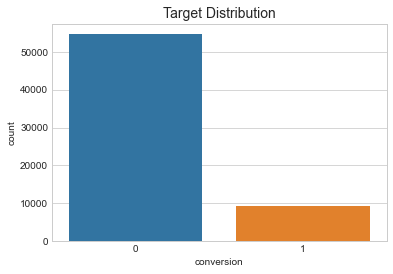

In [7]:
_ = sns.countplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

#### **4. Variable Datatypes**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             64000 non-null  int64  
 1   recency        64000 non-null  int64  
 2   history        64000 non-null  float64
 3   used_discount  64000 non-null  int64  
 4   used_bogo      64000 non-null  int64  
 5   zip_code       64000 non-null  object 
 6   is_referral    64000 non-null  int64  
 7   channel        64000 non-null  object 
 8   offer          64000 non-null  object 
 9   conversion     64000 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.9+ MB


#### **5. Null Values**

In [9]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

id               0.0
recency          0.0
history          0.0
used_discount    0.0
used_bogo        0.0
zip_code         0.0
is_referral      0.0
channel          0.0
offer            0.0
conversion       0.0
dtype: float64

#### **6. Unique values in each variable**

In [10]:
train.nunique()

id               64000
recency             12
history          34833
used_discount        2
used_bogo            2
zip_code             3
is_referral          2
channel              3
offer                3
conversion           2
dtype: int64

In [11]:
train.columns

Index(['id', 'recency', 'history', 'used_discount', 'used_bogo', 'zip_code',
       'is_referral', 'channel', 'offer', 'conversion'],
      dtype='object')

#### **7.There are two types of features that we have:**

1. Categorical
2. Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'conversion'



#### **8. Segregating Categorical & Numerical Variables**



In [12]:
cat_cols = ['recency',
 'used_discount',
 'used_bogo',
 'zip_code',
 'is_referral',
 'channel',
 'offer']

In [13]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['history']

#### **9. Categorical Features**


#### **Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

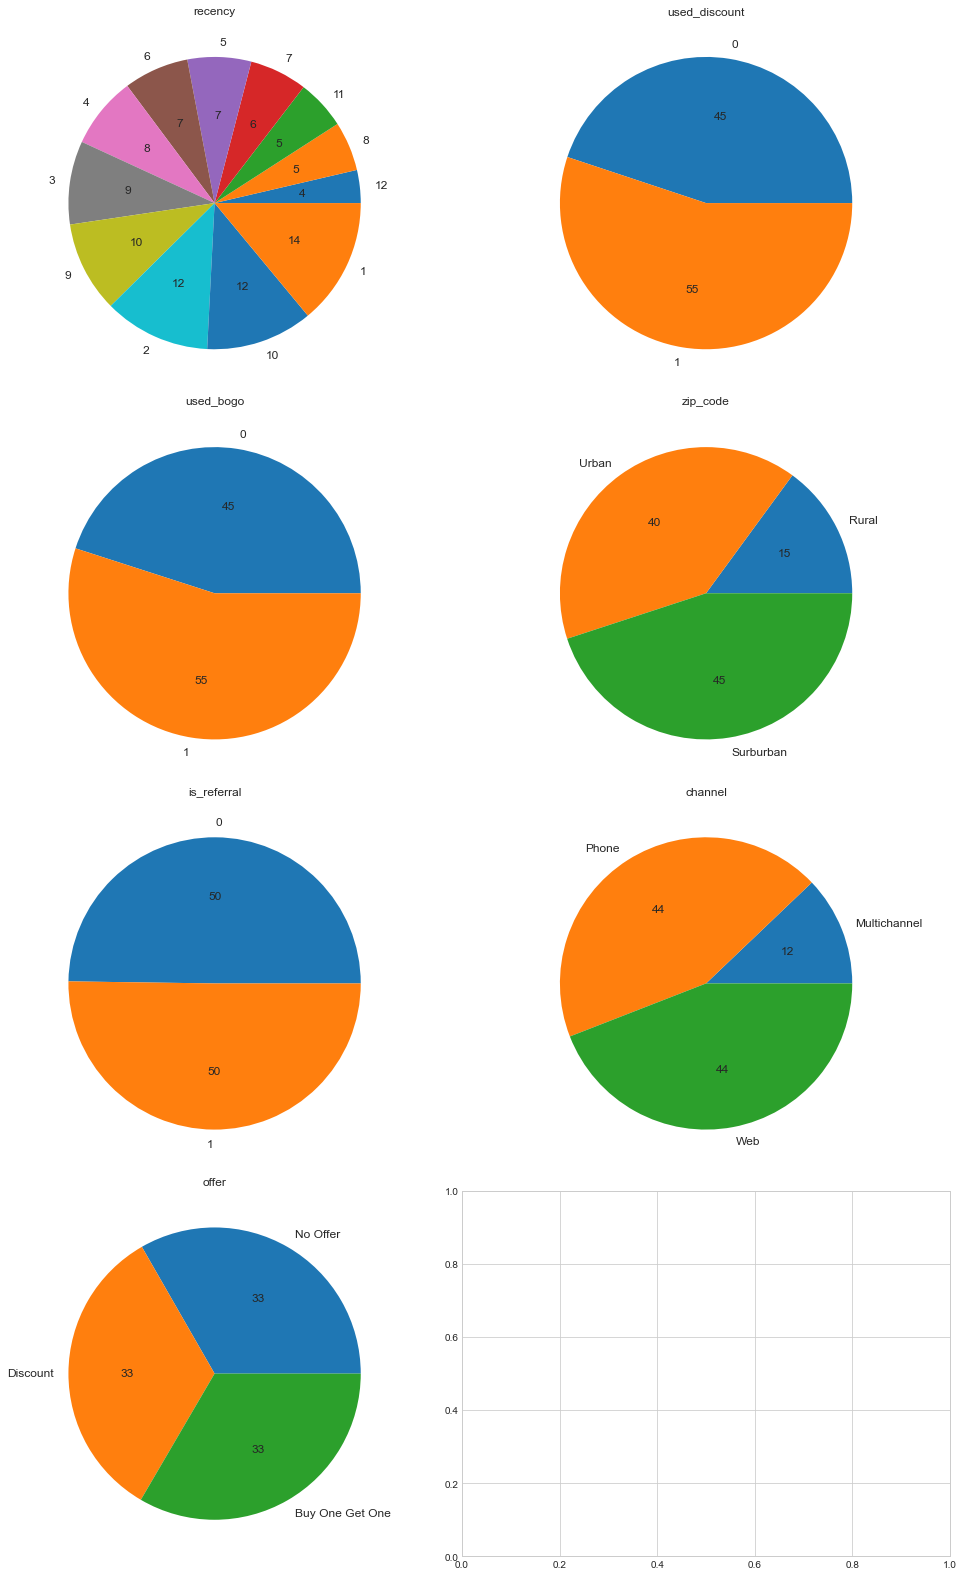

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

#### **Univariate Analysis - CountPlots**

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

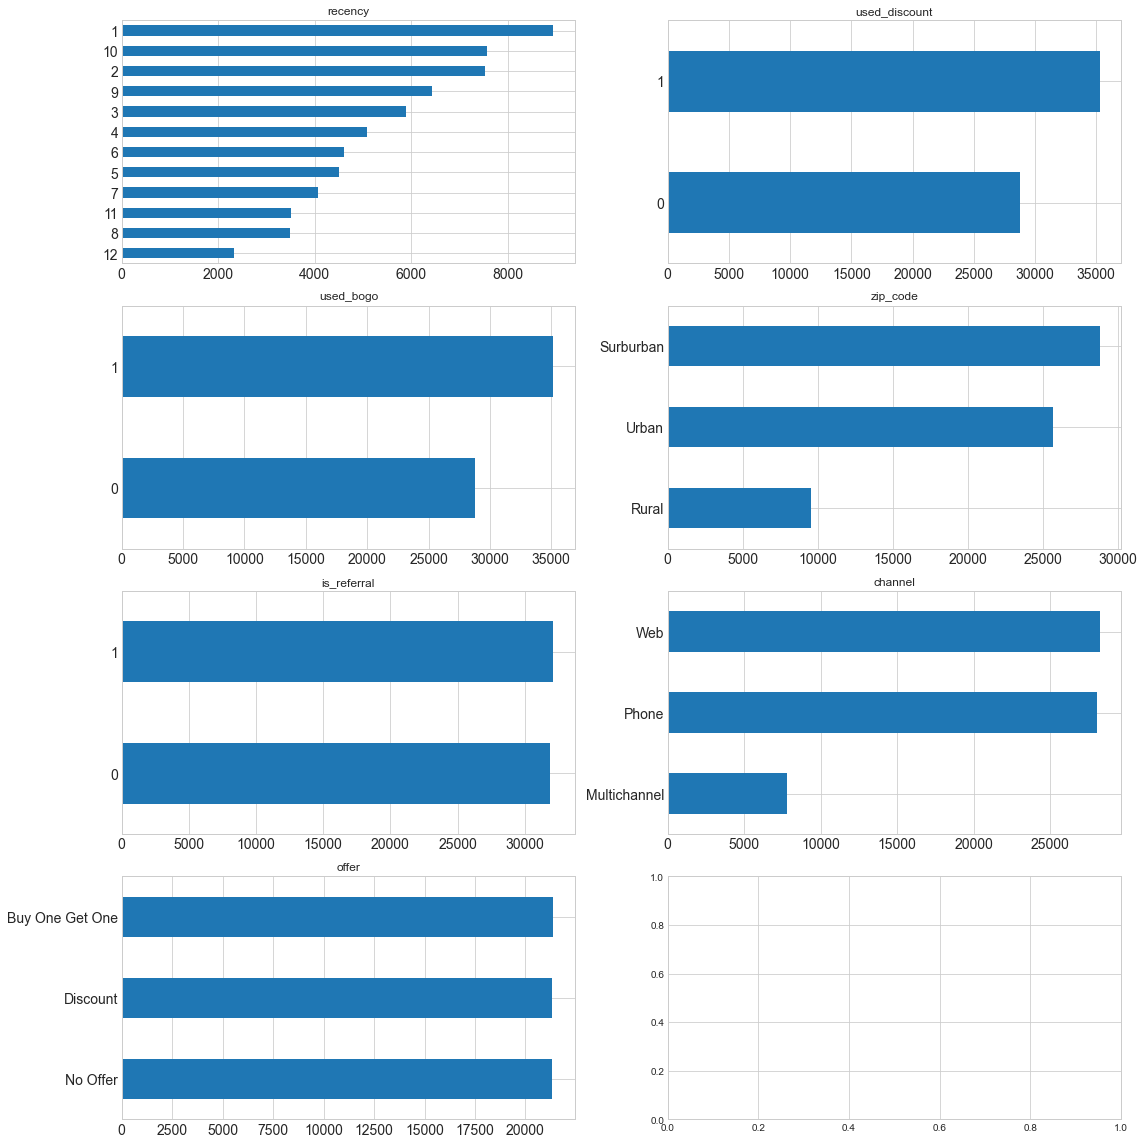

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

In [16]:
zipcode_channel = train.groupby(['zip_code', 'channel']).size().reset_index()
zipcode_channel.columns = ['zip_code', 'channel', 'conversion']
zipcode_channel = zipcode_channel.sort_values(by = 'conversion', ascending=False)

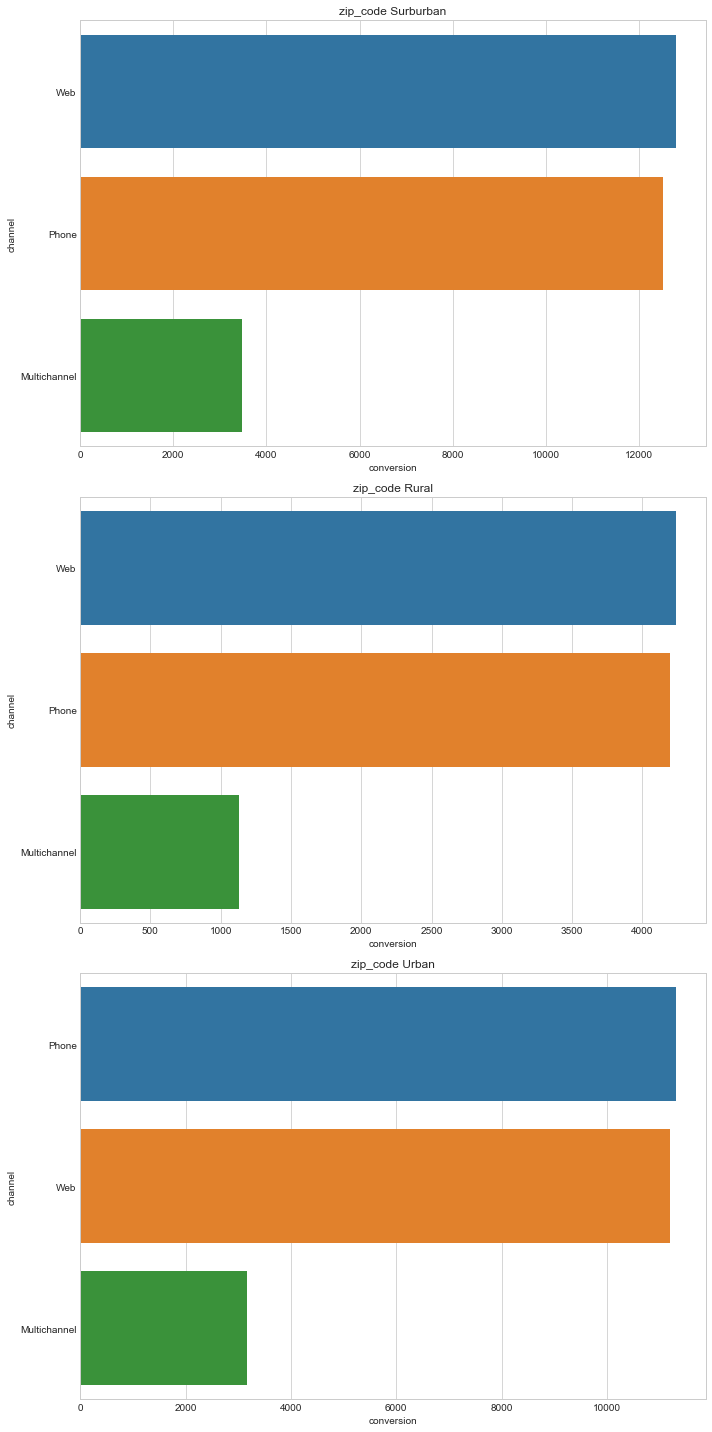

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

for i, c in enumerate(train['zip_code'].unique()):
    country = zipcode_channel[zipcode_channel['zip_code'] == c][:10]
    _ = sns.barplot(x = 'conversion', y = 'channel', data = country, ax = axes[i])
    _ = axes[i].set_title(f'zip_code {c}')

plt.tight_layout()

#### **Multivariate Analysis and Relationships with Target**

In [18]:
zipcode_offer_conversion = train.groupby(['zip_code', 'offer'])['conversion'].mean().reset_index()
zipcode_offer_conversion = zipcode_offer_conversion.sort_values(by = ['conversion'], ascending=False)

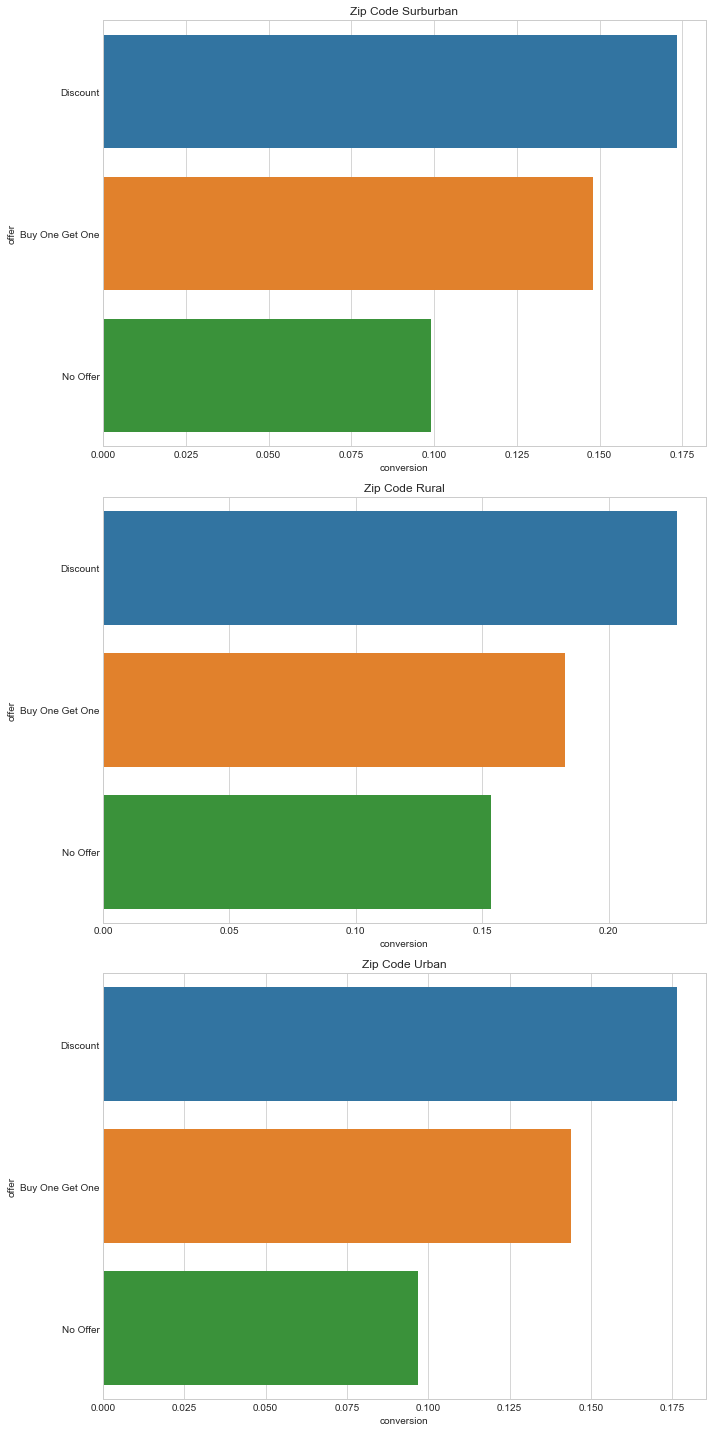

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

for i, c in enumerate(train['zip_code'].unique()):
    zipcode = zipcode_offer_conversion[zipcode_offer_conversion['zip_code'] == c][:10]
    _ = sns.barplot(x = 'conversion', y = 'offer', data = zipcode, ax = axes[i])
    _ = axes[i].set_title(f'Zip Code {c}')

plt.tight_layout()

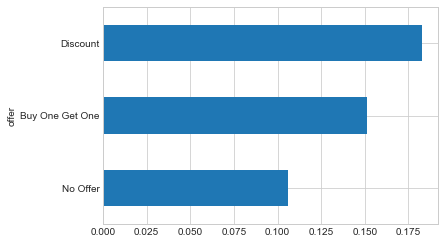

In [20]:
_ = train.groupby('offer')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

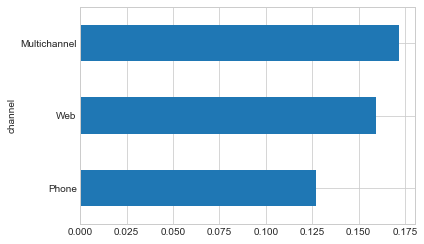

In [21]:
_ = train.groupby('channel')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

#### **9. Numerical Features**


##### **Univariate Analysis - Boxplots**

Boxplot can be used to see the spread of the numerical variables, and identify outliers

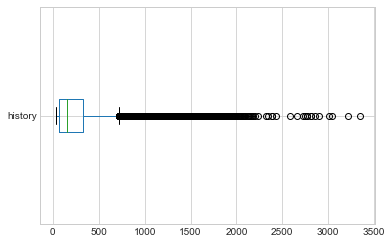

In [22]:

_ = train[['history']].boxplot(vert = False)

##### **Univariate Analysis - Density Plots**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

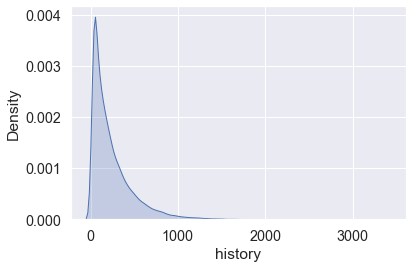

In [23]:
sns.set(font_scale=1.3)
plot = sns.kdeplot(data=train, x='history', fill=True)
plt.tight_layout()

##### **Bivariate Analysis KDE plots - Relationships with Target Variable**.

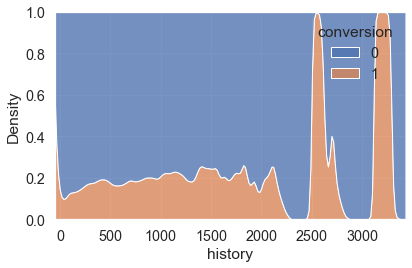

In [24]:
plot = sns.kdeplot(data=train, x='history', hue=TARGET_COL, multiple='fill')
plt.tight_layout()

##### **Bivariate Analysis - Horizontal BarPlots**

For each numerical Variable. We will plot the median of the numerical variable for:


1. When conversion == 0
2. when conversion == 1

**We are choosing median since median is not affected by outliers**, and our data has a lot of outlers

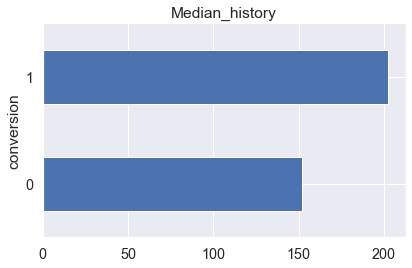

In [25]:
plot = train.groupby(TARGET_COL)['history'].median().plot(kind = 'barh', title=f'Median_history')
plt.tight_layout()

In [26]:
target = train[TARGET_COL]
target.value_counts()

0    54606
1     9394
Name: conversion, dtype: int64

#### 10.Baseline Models using Naive approach

In [27]:
from sklearn.metrics import accuracy_score, f1_score

#### Model A. (Predicting all instances as majority)

As we saw before too, 0 is the majority class. Lets begin by predicting everything as 0.

In [28]:
preds_target = np.zeros(len(train))

accuracy = accuracy_score(target, preds_target)
f1 = f1_score(target, preds_target)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.85321875
F1 score is: 0.0


Had the metric been accuracy, we would have got an accuracy of almost 85 %, but F1-score is forcing us to create a better model.

#### **Model B. (Random Predictions with equal probability)**

In [29]:
np.random.seed(2)

preds_target = np.random.choice([0, 1], size=len(train))

accuracy = accuracy_score(target, preds_target)
f1 = f1_score(target, preds_target)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.50328125
F1 score is: 0.22963214268404983


Not an excellent F1 score. Nevertheless it is much better than getting 0